In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataframe
df=pd.read_csv ("data/precipitacionsbarcelonadesde1786.csv")
#Remove the column ' Unnamed: 0'
#df.drop('Unnamed: 0', axis=1, inplace=True)
# fill 0 if we don´t have data
df.head()

,Any,Precip_Acum_Gener,Precip_Acum_Febrer,Precip_Acum_Marc,Precip_Acum_Abril,Precip_Acum_Maig,Precip_Acum_Juny,Precip_Acum_Juliol,Precip_Acum_Agost,Precip_Acum_Setembre,Precip_Acum_Octubre,Precip_Acum_Novembre,Precip_Acum_Desembre
0,1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


In [3]:
df['total'] = df[['Precip_Acum_Gener', 'Precip_Acum_Febrer', 'Precip_Acum_Marc',
       'Precip_Acum_Abril', 'Precip_Acum_Maig', 'Precip_Acum_Juny',
       'Precip_Acum_Juliol', 'Precip_Acum_Agost', 'Precip_Acum_Setembre',
       'Precip_Acum_Octubre', 'Precip_Acum_Novembre', 'Precip_Acum_Desembre']].sum(axis=1)
df

,Any,Precip_Acum_Gener,Precip_Acum_Febrer,Precip_Acum_Marc,Precip_Acum_Abril,Precip_Acum_Maig,Precip_Acum_Juny,Precip_Acum_Juliol,Precip_Acum_Agost,Precip_Acum_Setembre,Precip_Acum_Octubre,Precip_Acum_Novembre,Precip_Acum_Desembre,total
0,1786,32.8,28.4,84.4,42.3,8.5,38.0,6.8,52.1,62.0,57.0,195.8,114.1,722.2
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0,625.1
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3,728.8
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9,342.5
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9,855.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2017,32.0,31.2,136.4,48.1,20.4,25.9,7.2,17.4,53.3,128.2,15.2,3.1,518.4
232,2018,63.6,104.6,112.5,83.0,30.3,53.1,51.5,36.5,44.4,201.9,201.8,4.8,988.0
233,2019,18.2,4.6,0.3,36.2,109.0,19.3,75.8,23.1,71.5,83.2,39.4,119.2,599.8
234,2020,89.3,2.8,61.6,258.7,29.2,69.1,23.1,12.4,60.2,23.1,52.5,41.5,723.5


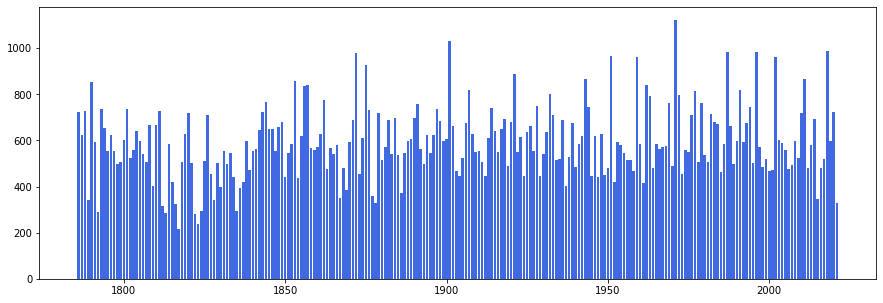

In [4]:
year=df['Any']
fig, ax  = plt.subplots(figsize = (15,5))
precip_total=df['total']
ax.bar(year, precip_total, color ='royalblue')
       #, label = 'temperature min',marker='o',markersize=6)

plt.show()

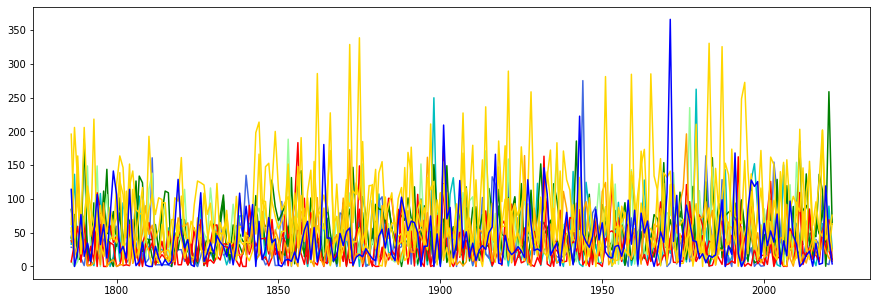

In [13]:
year=df['Any']
fig, ax  = plt.subplots(figsize = (15,5))
_color=['c','royalblue','green','green','palegreen','red','red','orange','gold','gold','gold','blue','blue']
num_color=0
for c in df.columns[1:13]:
    precip=df[c]
    ax.plot(year, precip, color = _color[num_color])
    num_color+=1
       #, label = 'temperature min',marker='o',markersize=6)
plt.show()

In [6]:
data = df[['Any', 'total']].set_index(['Any'])

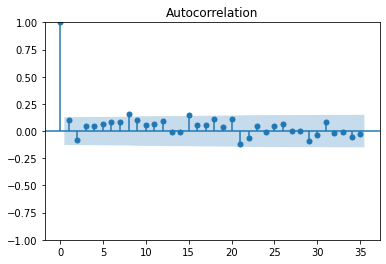

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(data, lags=35)
# Show the AR as a plot
plt.show()